In [1]:
# SH-I

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
lectins = ['ACG', 'CTB', 'DC_SIGN', 'Gal4', 'LCA', 'MAL', 'NPL', 'PSA', 'SBA', 'SNL', 'UEA']

lectin_dict = {'ACG' : 'Agrocybe cylindracea lectin',
               'CTB' : 'Cholera Toxin B subunit',
               'DC_SIGN' : 'DC-SIGN CRD',
               'Gal4' : 'Gal4-mAb',
               'LCA' : 'Lens culinaris Agglutinin',
               'MAL' : 'Maachkia amurensis Leukoagglutinin',
               'NPL' : 'Narcissus pseudonarcissus lectin',
               'PSA' : 'Pisum sativum Agglutinin',
               'SBA' : 'Soyabean Agglutinin',
               'SNL' : 'Sambucus nigra lectin',
               'UEA' : 'Ulex europaeus Agglutinin'}

In [171]:
def plot_final(lectin, save = False):
    
    fs = 15
    
    plt.rcParams['font.family'] = 'arial'
    
    aligned = pd.read_csv('figures/outputs/' + lectin + '.csv')
    aligned = merge(aligned)
    
    aligned['IUPAC (LiGA)'] = aligned['IUPAC (LiGA)'].fillna('')
    aligned['IUPAC (CFG)'] = aligned['IUPAC (CFG)'].fillna('')
    aligned['Mod IUPAC'] = aligned['Mod IUPAC'].fillna('')
    
    x1, y1 = aligned['IUPAC (LiGA)'], aligned['total']
    x2, y2, e2 = aligned['IUPAC (CFG)'], aligned['Average RFU'] / 1000, aligned['StDev'] / 1000
    x = aligned['Mod IUPAC']

    i1 = np.arange(len(x1))
    i2 = np.arange(len(x2))
    
    fig, (ax1, ax2) = plt.subplots(2, figsize = (20, 10))
    
    fig.suptitle(lectin_dict[lectin], fontsize = fs + 5, y = 0.92)

    liga = ax1.bar(i1, y1, color = 'steelblue', zorder = 3)
    ax1.xaxis.tick_top() 
    plt.sca(ax1)
    plt.ylabel('Enrichment', fontsize = fs)
    plt.xticks(i1, [])
    plt.grid(True, axis = 'x')
    for tic in ax1.xaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False

    cfg = ax2.bar(i2, y2, yerr = e2, capsize = 3, color = 'black', zorder = 3)
    plt.sca(ax2)
    plt.xlabel('Glycans', fontsize = fs)
    plt.ylabel('Average RFU x $10^3$', fontsize = fs)
    plt.xticks(i2, x, rotation = 'vertical')
    plt.grid(True, axis = 'x', zorder = 0)

    plt.subplots_adjust(hspace = 0.05)
    plt.legend([liga, cfg], ['LiGA', 'CFG'], loc = 4, prop = {'size': fs})
    
    if save:
        
        plt.savefig(fname = 'figures/final/' + lectin + '.pdf', bbox_inches = 'tight')
    
    else:
        
        plt.show()

In [172]:
def merge(aligned):
    
    liga = aligned['IUPAC (LiGA)']
    cfg = aligned['IUPAC (CFG)']

    mod_iupac = []

    for l, c in zip(liga, cfg):

        if c is np.NaN:

            link = '-' + str(l).split('-')[-1]
            glycan = '-'.join(str(l).split('-')[:-1])

        elif l is np.NaN:

            link = '-' + str(c).split('-')[-1]
            glycan = '-'.join(str(c).split('-')[:-1])

        else:

            l_link = str(l).split('-')[-1]
            c_link = str(c).split('-')[-1]

            link = '-' + c_link + '/' + l_link 
            glycan = '-'.join(str(l).split('-')[:-1])
            
        mod = glycan + link
        
        if len(mod) > 50:
            
            mod = mod[:40] + '...' + mod[-7:]

        mod_iupac.append(mod)

    aligned['Mod IUPAC'] = mod_iupac
    
    return aligned

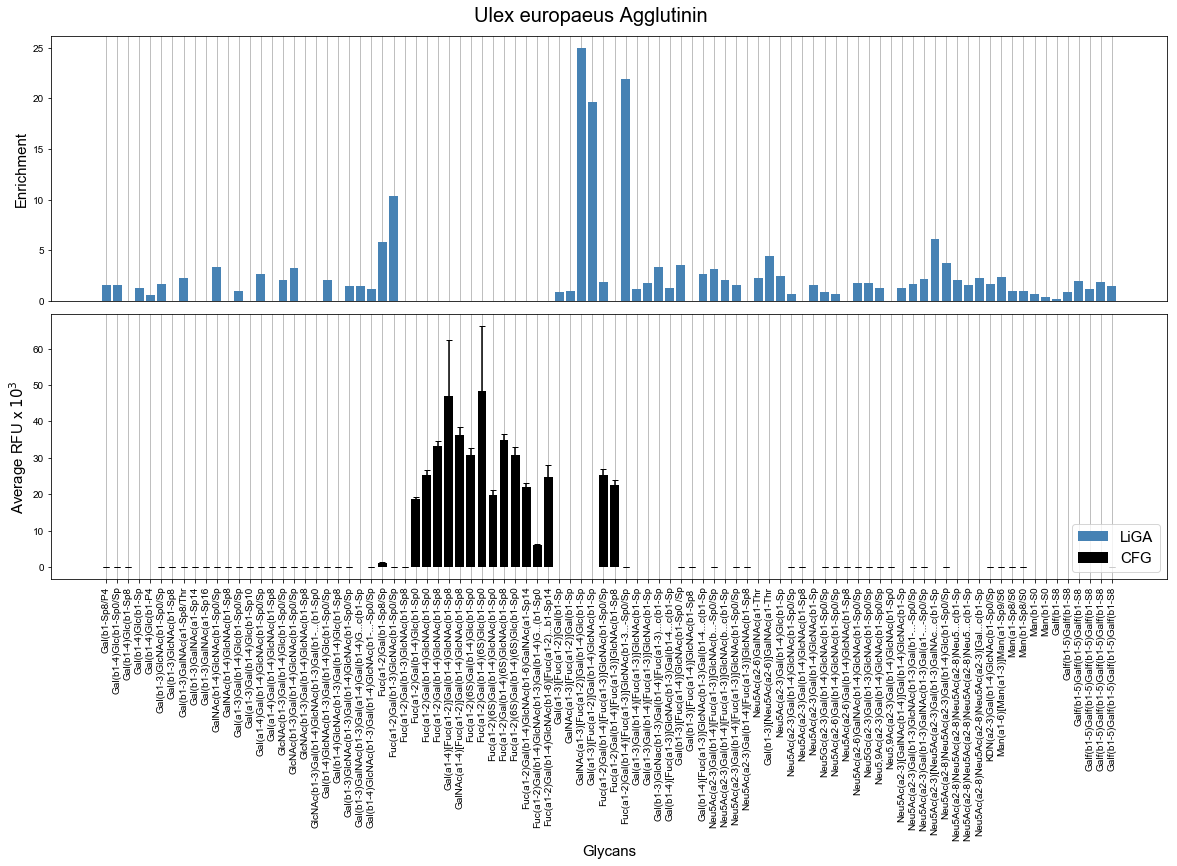

In [173]:
plot_final('UEA', save = True)